In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pkl
import random
import plotly.express as px
import time
import seaborn as sns
sns.set_theme('talk', palette=sns.color_palette('Set2'))
pd.options.display.max_columns = 30
pd.options.display.max_colwidth = 150

## train data load

In [2]:
# infile = open('..//4_data_preparation_for_training//X_train','rb')
# X_train = pkl.load(infile)
# infile.close()

# infile = open('..//4_data_preparation_for_training//X_test','rb')
# X_test = pkl.load(infile)
# infile.close()

# infile = open('..//4_data_preparation_for_training//y_train','rb')
# y_train = pkl.load(infile)
# infile.close()

# infile = open('..//4_data_preparation_for_training//y_test','rb')
# y_test = pkl.load(infile)
# infile.close()

# X_train = X_train.values
# X_test = X_test.values
# y_train = y_train.values
# y_test = y_test.values

In [3]:
path = '/home/piotr/projects/apartment_price_estimator_v2'

with open(f'{path}/trainer/train_data/x_train.pkl','rb') as file:
    x_train = pkl.load(file)

with open(f'{path}/trainer/train_data/y_train.pkl','rb') as file:
    y_train = pkl.load(file)

with open(f'{path}/trainer/train_data/x_test.pkl','rb') as file:
    x_test = pkl.load(file)

with open(f'{path}/trainer/train_data/y_test.pkl','rb') as file:
    y_test = pkl.load(file)

for frame in [x_train,x_test]:
    frame.drop('date', axis=1, inplace=True)

for frame in [x_train,y_train,x_test,y_test]:
    frame = frame.values

In [4]:
x_train = x_train.values
# y_train = y_train.values
x_test = x_test.values
# y_test = y_test.values

## creating model

In [5]:
x_train.shape, x_test.shape

((24612, 637), (6154, 637))

In [6]:
from xgboost import XGBRegressor

model = XGBRegressor(objective='reg:squarederror',
                     n_estimators=500,
                     tree_method='hist',
                     random_state=42,
                    #  early_stopping_rounds=20
                     )

model.fit(X=x_train,
          y=y_train,
          verbose=True,
        #   eval_set=[(x_test, y_test)]
          )

/home/piotr/miniconda3/envs/apt2/lib/python3.11/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

## model evaluation

In [7]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

predictions = model.predict(x_test)
print(f'MAE\t{round(mean_absolute_error(y_test, predictions))}')
print(f'MSE\t{round(np.sqrt(mean_squared_error(y_test, predictions)))}')
print(f'R^2\t{round(r2_score(y_test, predictions),2)}')

MAE	92764
MSE	155222
R^2	0.87


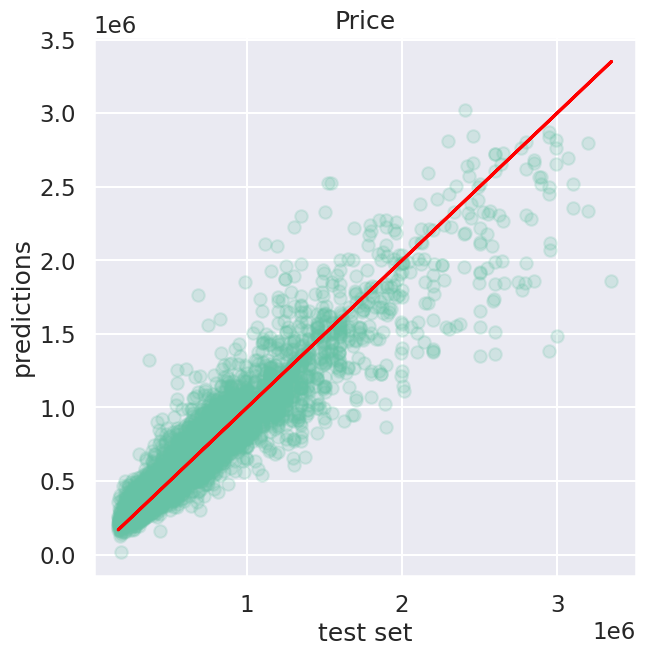

In [8]:
plt.figure(figsize=(7,7))
# plt.xlim(0,500)
# plt.ylim(0,500)

# Predictions
plt.scatter(x=y_test,y=predictions,edgecolor=None,alpha=0.2)
plt.xlabel('test set')
plt.ylabel('predictions')
plt.title('Price')

# Perfect predictions
plt.plot(y_test,y_test,'r')

Text(0.5, 1.0, 'Error distribution')

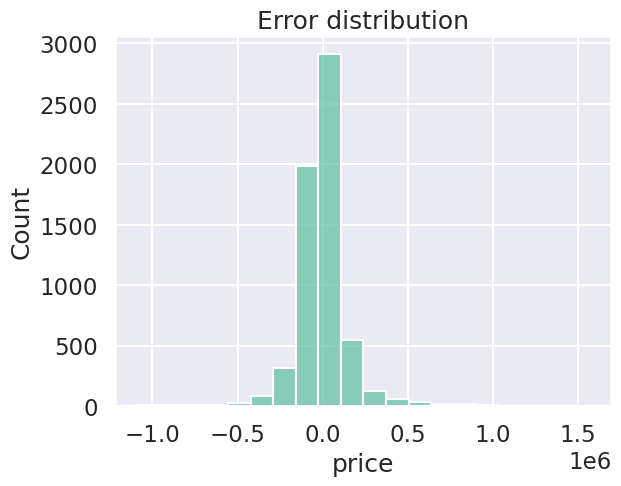

In [9]:
errors = y_test - predictions.reshape(y_test.shape[0])

# plt.xlim(-2e5,2e5)

sns.histplot(errors, bins=20)
plt.title('Error distribution')

Text(0.5, 1.0, 'Errors boxplot')

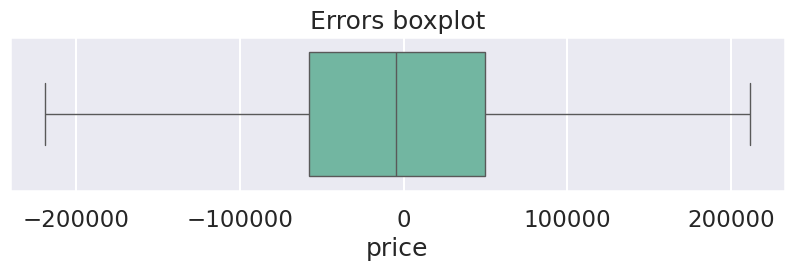

In [10]:
plt.figure(figsize=(10,2))
sns.boxplot(x=errors, showfliers=False)
plt.title('Errors boxplot')

In [11]:
predictions.reshape(y_test.shape[0])[:20]

array([ 842316.7 ,  349912.53,  815808.2 , 2637759.5 ,  547708.4 ,
        679411.8 ,  456255.  ,  700764.56,  900817.3 , 1318958.4 ,
        600461.56, 1496036.2 , 1632943.2 ,  878738.9 , 1006069.5 ,
        479220.16,  554198.1 , 1736929.9 ,  397544.16, 1458768.5 ],
      dtype=float32)

In [12]:
y_test[:20]

id
27884     959000.0
24908     380000.0
25875     799000.0
23052    2415230.0
7328      599000.0
16027     629279.0
22142     379242.0
13412     754210.0
6693      937440.0
4704     1500000.0
648       650000.0
24029    1445360.0
27251    1450000.0
6559      876684.0
22254     789000.0
16680     600000.0
2109      591528.0
11790    1085000.0
29326     369000.0
17053    1300000.0
Name: price, dtype: float64

In [13]:
predictions.reshape(y_test.shape[0])[:20]/y_test[:20]

id
27884    0.878328
24908    0.920822
25875    1.021037
23052    1.092136
7328     0.914371
16027    1.079667
22142    1.203071
13412    0.929137
6693     0.960933
4704     0.879306
648      0.923787
24029    1.035061
27251    1.126168
6559     1.002344
22254    1.275120
16680    0.798700
2109     0.936892
11790    1.600857
29326    1.077355
17053    1.122130
Name: price, dtype: float64

## saving data

In [14]:
# from datetime import datetime
# from tensorflow.keras.models import load_model
# timestamp = datetime.now().strftime("%Y-%m-%d--%H-%M")
# model.save('ann_models\\' + 'ann_model_' + timestamp)

In [15]:
# import joblib
# joblib.dump(scaler, 'scaler')